In [1]:
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv'
filename = 'cars_clus.csv'
df=urllib.request.urlretrieve(url, filename)
print(type(df))
import pandas as pd
pdf = pd.read_csv(filename,na_values = "$null$")
pdf

<class 'tuple'>


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,NaN,0.0,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864,0.0
155,Volvo,C70,3.493,NaN,0.0,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251,0.0
156,Volvo,S80,18.969,NaN,0.0,36.00,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,2.943,0.0
157,NaN,newCar,NaN,NaN,NaN,21.50,1.5,76.0,106.3,67.9,175.0,2.932,11.9,46.0,NaN,1.0


In [2]:
df

('cars_clus.csv', <http.client.HTTPMessage at 0x269bc03dab0>)

# Parte 1

In [38]:
!pip install -q missingno

<Axes: >

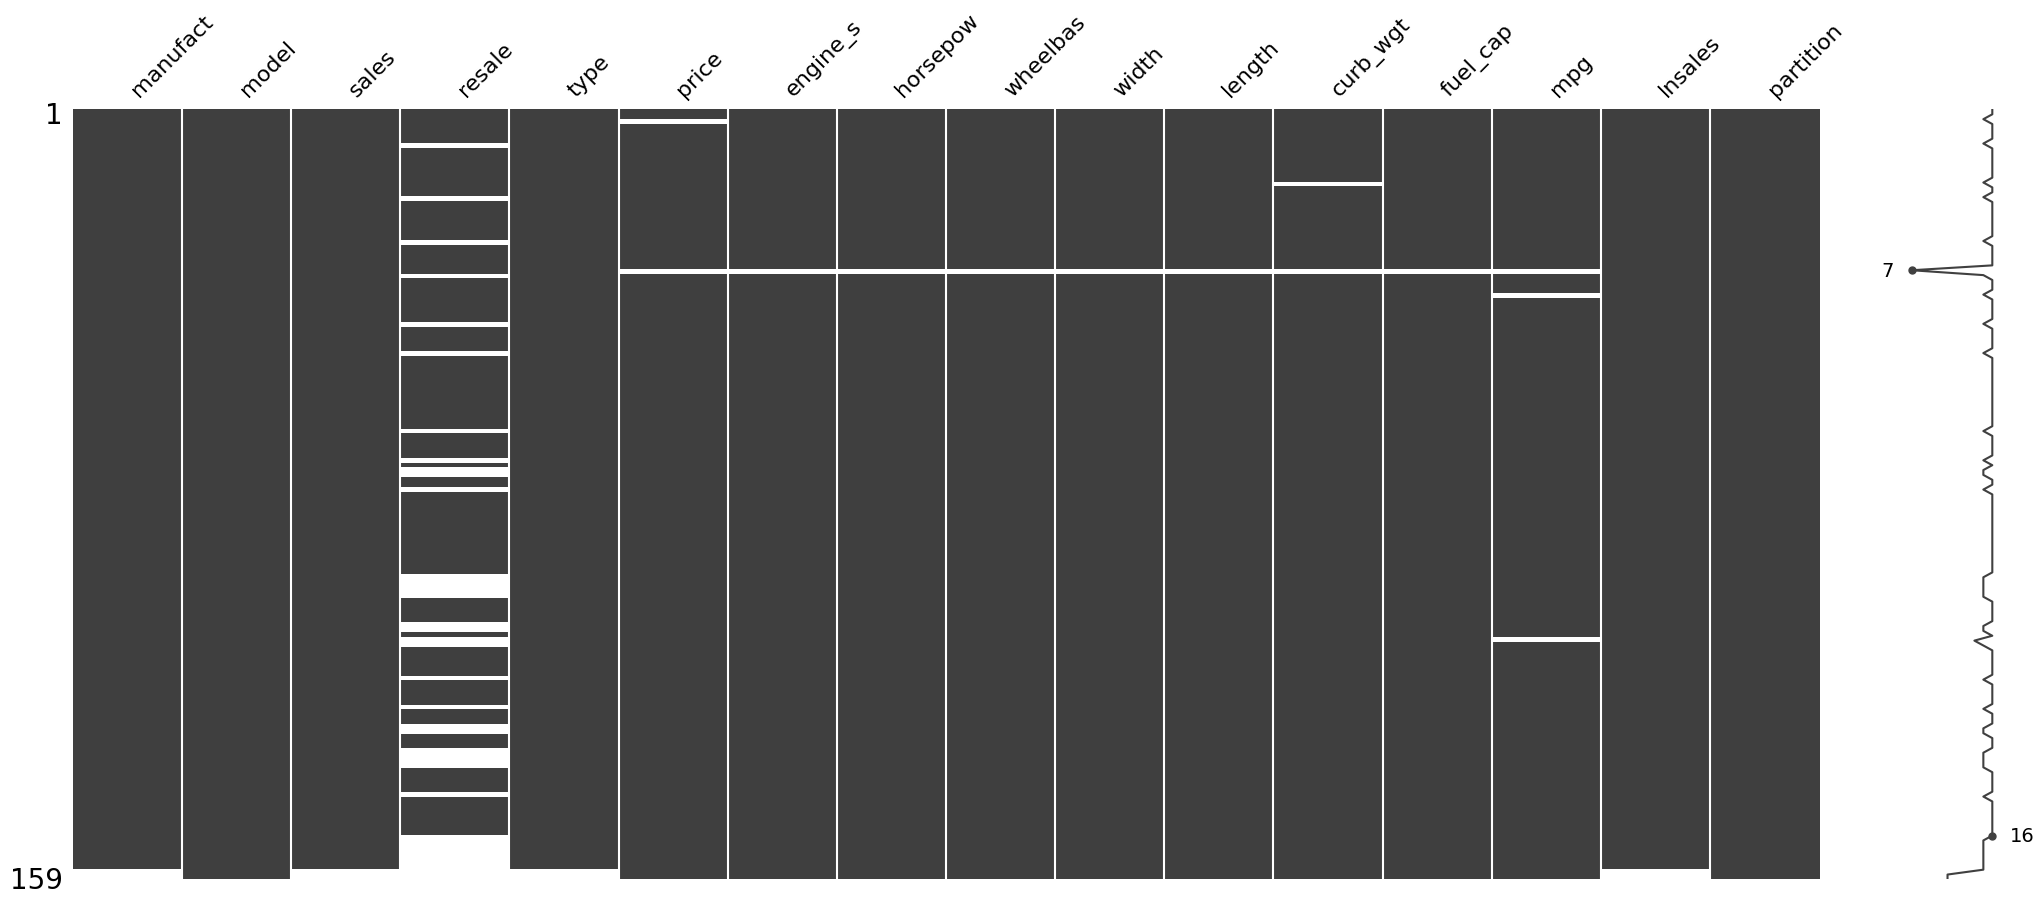

In [3]:
import missingno as msno
msno.matrix(pdf) # Stack plot de nulos

In [7]:
pdf.duplicated(subset=['model','type']).sum()

1

In [8]:
pdf.duplicated().sum() # cantidad de duplicados

0

# Parte 2

In [9]:
# Integridad básica
pdf.isnull().sum()

manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

In [10]:
pdf.info() # información general del Df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      157 non-null    float64
 3   resale     121 non-null    float64
 4   type       157 non-null    float64
 5   price      157 non-null    float64
 6   engine_s   158 non-null    float64
 7   horsepow   158 non-null    float64
 8   wheelbas   158 non-null    float64
 9   width      158 non-null    float64
 10  length     158 non-null    float64
 11  curb_wgt   157 non-null    float64
 12  fuel_cap   158 non-null    float64
 13  mpg        156 non-null    float64
 14  lnsales    157 non-null    float64
 15  partition  159 non-null    float64
dtypes: float64(14), object(2)
memory usage: 20.0+ KB


In [11]:
pdf.dtypes # tipos de datos

manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
dtype: object

In [12]:
pdf.shape # cantidad de filas y columnas

(159, 16)

In [15]:
type(pdf)

pandas.core.frame.DataFrame

In [13]:
pdf.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [15]:
pdf.head(3)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0


In [16]:
pdf.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,157.000000,121.000000,157.000000,157.000000,158.000000,158.000000,158.000000,158.000000,158.000000,157.000000,158.000000,156.000000,157.000000,159.000000
mean,52.998076,18.072975,0.261146,27.396605,3.053797,185.132911,107.494304,71.155063,187.272152,3.382382,17.908861,23.999359,3.295847,0.012579
std,68.029422,11.453384,0.440665,14.277567,1.045989,57.031459,7.595307,3.454759,13.382310,0.633938,3.893378,4.612780,1.318218,0.111799
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.000000
25%,14.114000,11.260000,0.000000,18.145000,2.300000,148.500000,103.025000,68.400000,177.525000,2.967000,15.800000,21.000000,2.647000,0.000000
50%,29.450000,14.180000,0.000000,22.799000,3.000000,175.000000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,3.383000,0.000000
75%,67.956000,19.875000,1.000000,31.965000,3.500000,215.000000,112.200000,73.475000,196.050000,3.821000,19.475000,26.000000,4.219000,0.000000
max,540.561000,67.550000,1.000000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,46.000000,6.293000,1.000000


# Parte 3

In [17]:
pdf['manufact'].value_counts().sort_values(ascending=False)

Dodge            11
Ford             11
Toyota            9
Chevrolet         9
Mercedes-Benz     9
Mitsubishi        7
Nissan            7
Chrysler          7
Volvo             6
Oldsmobile        6
Lexus             6
Mercury           6
Pontiac           6
Volkswagen        6
Honda             5
Cadillac          5
Saturn            5
Plymouth          4
Acura             4
Buick             4
Audi              3
Jeep              3
Porsche           3
Hyundai           3
BMW               3
Lincoln           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: manufact, dtype: int64

<Axes: title={'center': 'Primeros 10 manufactureros'}, xlabel='Manufacturero', ylabel='Frecuencia'>

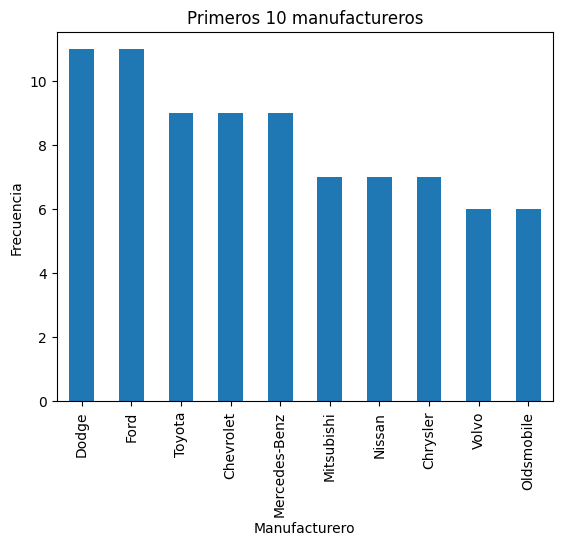

In [18]:
pdf['manufact'].value_counts()[0:10].plot(kind='bar', xlabel='Manufacturero',ylabel='Frecuencia',
                                         title='Primeros 10 manufactureros')

In [21]:
pdf[['manufact','model']].value_counts()

manufact    model   
Acura       CL          1
Oldsmobile  Alero       1
Nissan      Altima      1
            Frontier    1
            Maxima      1
                       ..
Ford        Mustang     1
            Ranger      1
            Taurus      1
            Windstar    1
Volvo       V70         1
Length: 157, dtype: int64